In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
# nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from keras.layers import Dense, Input
from keras.layers.merge import concatenate
%matplotlib inline
import tensorflow as tf
tf.test.gpu_device_name()

C:\Users\ZhiQi\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


'/device:GPU:0'

In [2]:

beauty = pd.read_csv('beauty_shuffled.csv')

beauty_test['title'] = beauty_test.title.str.replace('lipstick', 'lip stick')
beauty_test['title'] = beauty_test.title.str.replace('lipcream', 'lip cream')
beauty_test['title'] = beauty_test.title.str.replace('lipcgloss', 'lip gloss')
beauty_test['title'] = beauty_test.title.str.replace('lipliner', 'lip liner')
beauty_test['title'] = beauty_test.title.str.replace('lipbalm', 'lip balm')
beauty_test['title'] = beauty_test.title.str.replace('stik', 'stick')
# beauty = train_set.iloc[:286583]

# beauty = beauty.sample(frac=1)

# beauty.to_csv('beauty_shuffled.csv')

# fashion = train.iloc[286584:506285]
# mobile = train_set.iloc[506285:]
 
# testset = pd.read_csv('test.csv')
# # fashion_test = testset.iloc[]
# beauty_test = testset.iloc[:76545]
# fashion_test = testset.iloc[76545:131985]
# mobile_test = testset.iloc[131985:]
beauty.tail()


,Unnamed: 0,Unnamed: 0.1,itemid,title,Category,image_path
286578,286578,269922,1482463264,niceface lip stick cair warna metalik,12,beauty_image/a6d68c7eeb92793bbe4f24abc5b86304.jpg
286579,286579,51964,1069667925,innisfree no sebum mineral powder 5g,3,beauty_image/db67da6f6a585e20e9488992c96fdf1f.jpg
286580,286580,240225,1047451366,lacoco hydrating divine essence,1,beauty_image/dd0d7a99e050e6fcb1bf383655497d23.jpg
286581,286581,215190,1690921131,termurah etude house zero sebum drying powder,3,beauty_image/41c3262140a29e378dfae1d31d43fd1b.jpg
286582,286582,246128,41127878,milani face iluminating powder,8,beauty_image/8e7dff2ef8d3116d0c6bab97df2c8b00.jpg


Train on 229266 samples, validate on 57317 samples
Epoch 1/20
229266/229266 [==============================] - 22s 97us/step - loss: 1.5364 - acc: 0.5424 - val_loss: 0.9851 - val_acc: 0.7114
Epoch 2/20
229266/229266 [==============================] - 22s 95us/step - loss: 0.9123 - acc: 0.7295 - val_loss: 0.8178 - val_acc: 0.7548
Epoch 3/20
229266/229266 [==============================] - 20s 87us/step - loss: 0.7922 - acc: 0.7599 - val_loss: 0.7656 - val_acc: 0.7673
Epoch 4/20
229266/229266 [==============================] - 21s 91us/step - loss: 0.7342 - acc: 0.7740 - val_loss: 0.7448 - val_acc: 0.7739
Epoch 5/20
229266/229266 [==============================] - 17s 75us/step - loss: 0.6919 - acc: 0.7844 - val_loss: 0.7391 - val_acc: 0.7752
Epoch 6/20
229266/229266 [==============================] - 17s 74us/step - loss: 0.6568 - acc: 0.7940 - val_loss: 0.7294 - val_acc: 0.7788
Epoch 7/20
229266/229266 [==============================] - 17s 75us/step - loss: 0.6272 - acc: 0.8013 - val_

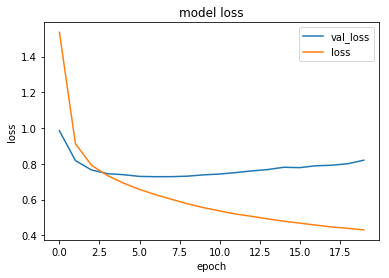

In [3]:
####Model building

import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import text, sequence
from keras import utils


from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

train_size = int(len(beauty) * 0.8) 
train_title = beauty['title'][:train_size] #Takes 70% of the training data to train
train_Category = beauty['Category'][:train_size] #Takes 70% of the training data to train

eval_title = beauty['title'][train_size:] #Takes remaining 30% of the training data to test
eval_Category = beauty['Category'][train_size:] #Takes remaining 30% of the training data to test

max_words = 5000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_title) # only fit on train

x_train = tokenize.texts_to_matrix(train_title)
x_eval = tokenize.texts_to_matrix(eval_title)

encoder = LabelEncoder()
encoder.fit(train_Category)
y_train = encoder.transform(train_Category)
y_eval = encoder.transform(eval_Category)
y_train = train_Category
y_eval = eval_Category


num_classes = np.max(y_train) - np.min(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_eval = utils.to_categorical(y_eval, num_classes)

batch_size = 4192
epochs = 20

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    validation_data=[x_eval, y_eval],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

def display_training_graph(history):
    # summarize history for loss
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'loss'], loc='upper right')
    plt.draw()


display_training_graph(history)

In [4]:
### computing training accuracy using inhouse testset

score = model.evaluate(x_eval, y_eval,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

57317/57317 [==============================] - 2s 41us/step
Test accuracy: 0.7851073796393839


In [ ]:
# ### Predicting using actual testset

# test_title = beauty_test['title']
# x_test = tokenize.texts_to_matrix(test_title)
# score = model.predict(x_test, batch_size=batch_size, verbose=1)

In [ ]:
# #predicting using actual test set
# beauty_predict = pd.DataFrame(data=score)
# beauty_predict = beauty_predict.idxmax(axis=1)

In [ ]:
# beauty_predict.to_csv('beauty_predict.csv') 

In [5]:
model_json = model.to_json()
with open("model_beauty_text_final_v3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_beauty_text_final_v3.h5")
print("Saved model to disk")

Saved model to disk
